In [1]:
import pandas as pd #is used because it allows us to organize data in a tabular form and attach a descriptive index to each row and column.
import numpy as np #is used for working with arrays.
import seaborn as sns #is used for data visualization and plotting graphs.
import matplotlib.pyplot as plt #is usedd for data visualization and plotting graphs.
from sklearn.model_selection import train_test_split #is used to split the data into training and testing sets.
from sklearn.metrics import accuracy_score #is used to measure the accuracy of the model.
from sklearn.metrics import classification_report #is used to measure the quality of predictions from a classification algorithm.
from sklearn.metrics import confusion_matrix #is used to measure the quality of predictions from a classification algorithm.
import re #is used to work with regular expressions.
import string #is used to work with string data.

Reading the csv file...

In [2]:
data_fake=pd.read_csv('Fake.csv')#is used to read the csv file.
data_true=pd.read_csv('True.csv')

In [3]:
data_fake.head()#is used to display the first five rows of the dataset.

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()#is used to display the first five rows of the dataset.

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Insert column class as a target feature...

In [5]:
data_fake["class"]=0#is used to add a new column to the dataset and assign a value of 0 to it.
data_true["class"]=1#is used to add a new column to the dataset and assign a value of 1 to it.

shape is used to display the number of rows and columns in the dataset.
shape method return shape of the array in tuple format.
a tuple containing the quantity of rows and columns respectively.
(rows, columns)

In [6]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

let's remove the last 10 rows from both the datasets as they are not useful for manaual testing

In [7]:
data_fake_manual_testing=data_fake.tail(10)#is used to select the last 10 rows of the dataset.
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)#is used to delete the last 10 rows of the dataset.

data_true_manual_testing=data_true.tail(10)#is used to select the last 10 rows of the dataset.
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)#is used to delete the last 10 rows of the dataset.


In [8]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing["class"]=0#is used to add a new column to the dataset and assign a value of 0 to it.
data_true_manual_testing["class"]=1#is used to add a new column to the dataset and assign a value of 1 to it.

C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_5484\3604837468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"]=0#is used to add a new column to the dataset and assign a value of 0 to it.
C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_5484\3604837468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"]=1#is used to add a new column to the dataset and assign a value of 1 to it.


In [10]:
data_fake_manual_testing.head(10)#is used to display the first five rows of the dataset.

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
data_true_manual_testing.head(10)#is used to display the first five rows of the dataset.

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
data_merge=pd.concat([data_fake,data_true],axis=0)#is used to concatenate the two datasets.
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


Merge True and fake dataframes into one dataframe

In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

Remove the unnecessary columns from the dataframe

In [14]:
data=data_merge.drop(["title","subject","date"],axis=1)#is used to drop the columns from the dataset.

In [15]:
data.isnull().sum()#is used to check for null values in the dataset.

text     0
class    0
dtype: int64

Random Shuffle the dataframe

In [16]:
data=data.sample(frac=1)#is used to shuffle the dataset.

In [17]:
data.head()

,text,class
1347,(Reuters) - California Governor Jerry Brown on...,1
21099,LONDON (Reuters) - Britain will pledge on Mond...,1
5835,TOKYO (Reuters) - Japan is hammering out plans...,1
5409,Right-wing super troll and Breitbart.com contr...,0
15623,"PALERMO, Italy (Reuters) - Silvio Berlusconi s...",1


In [18]:
data.reset_index(inplace=True)#is used to reset the index of the dataset.
data.drop(["index"],axis=1,inplace=True)#is used to drop the index column from the dataset.

In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:
data.head()

,text,class
0,(Reuters) - California Governor Jerry Brown on...,1
1,LONDON (Reuters) - Britain will pledge on Mond...,1
2,TOKYO (Reuters) - Japan is hammering out plans...,1
3,Right-wing super troll and Breitbart.com contr...,0
4,"PALERMO, Italy (Reuters) - Silvio Berlusconi s...",1


Create a function to process the text data in the dataframe

In [21]:
def wordopt(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [22]:
data["text"]=data["text"].apply(wordopt)#is used to apply the wordopt function to the text column of the dataset.

Define Dependent and Independent variables

In [23]:
x=data["text"]
y=data["class"]

Spliting the dataset into training and testing sets

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)#is used to split the dataset into training and testing sets.

Convert the text data into vectors because machine learning model can't understand the text data

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer #is used to convert the text data into vectors.

vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)#is used to fit and transform the training data.
xv_test=vectorization.transform(x_test)#is used to transform the testing data.

Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression #is used to import the logistic regression model.

LR=LogisticRegression() #is used to create an instance of the logistic regression model.
LR.fit(xv_train,y_train)#is used to train the model.

LogisticRegression()

In [27]:
pred_lr=LR.predict(xv_test)#is used to predict the values for the testing data.

In [28]:
LR.score(xv_test,y_test)#is used to calculate the accuracy of the model.

0.9859180035650624

In [29]:
print(classification_report(y_test,pred_lr))#is used to print the classification report of the model.

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5881
           1       0.98      0.99      0.99      5339

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion Matrix for Logistic Regression Model is:

<Axes: >

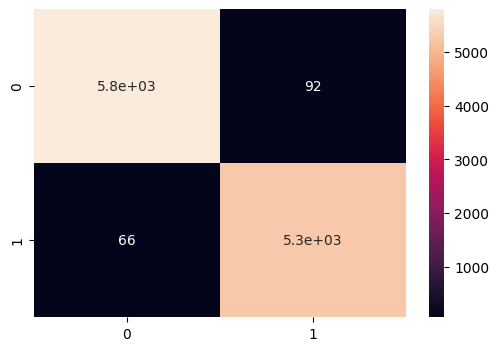

In [30]:
#confusion matrix
cm=confusion_matrix(y_test,pred_lr)
cm
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)#is used to plot the heatmap of the confusion matrix.

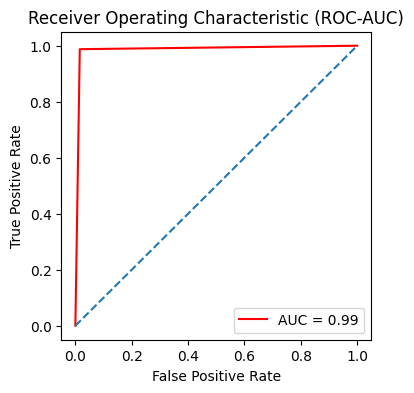

In [31]:
#generate roc auc curve values
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
roc_auc = auc(fpr, tpr)

#plot roc auc curve
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic (ROC-AUC)')
plt.plot(fpr, tpr, color='red',label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Random Forest Classifier Model

In [32]:
from sklearn.ensemble import RandomForestClassifier #is used to import the random forest classifier model.

RF=RandomForestClassifier()#is used to create an instance of the random forest classifier model.
RF.fit(xv_train,y_train)#is used to train the model.

RandomForestClassifier()

In [33]:
pred_rf=RF.predict(xv_test)#is used to predict the values for the testing data.

In [34]:

RF.score(xv_test,y_test)#is used to calculate the accuracy of the model.

0.9894830659536542

In [35]:

print(classification_report(y_test,pred_rf))#is used to print the classification report of the model.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5881
           1       0.99      0.99      0.99      5339

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Confusion Matrix for Random Forest Classifier Model is:

<Axes: >

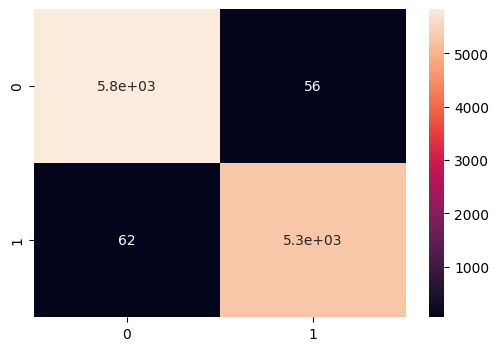

In [36]:
#confusion matrix
cm=confusion_matrix(y_test,pred_rf)
cm
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)#is used to plot the heatmap of the confusion matrix.

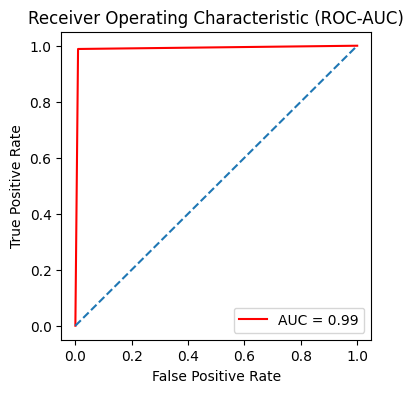

In [37]:
#generate roc auc curve values for random forest classifier
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)

#plot roc auc curve for random forest classifier
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic (ROC-AUC)')
plt.plot(fpr, tpr, color='red',label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

K Nearest Neighbors Classifier Model

In [38]:
#KNN
from sklearn.neighbors import KNeighborsClassifier #is used to import the KNN classifier model.

KNN=KNeighborsClassifier()#is used to create an instance of the KNN classifier model.
KNN.fit(xv_train,y_train)#is used to train the model.

KNeighborsClassifier()

In [39]:
pred_knn=KNN.predict(xv_test)#is used to predict the values for the testing data.

In [40]:
KNN.score(xv_test,y_test)#is used to calculate the accuracy of the model.

0.6906417112299466

In [41]:
print(classification_report(y_test,pred_knn))#is used to print the classification report of the model.

              precision    recall  f1-score   support

           0       0.63      0.97      0.77      5881
           1       0.93      0.38      0.54      5339

    accuracy                           0.69     11220
   macro avg       0.78      0.68      0.65     11220
weighted avg       0.77      0.69      0.66     11220



Confusion Matrix for K Nearest Neighbors Classifier Model is:

<Axes: >

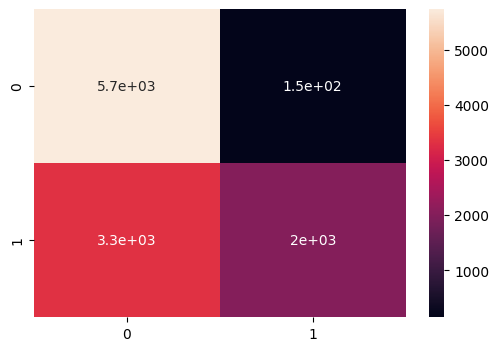

In [42]:
#confusion matrix
cm=confusion_matrix(y_test,pred_knn)
cm
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)#is used to plot the heatmap of the confusion matrix.

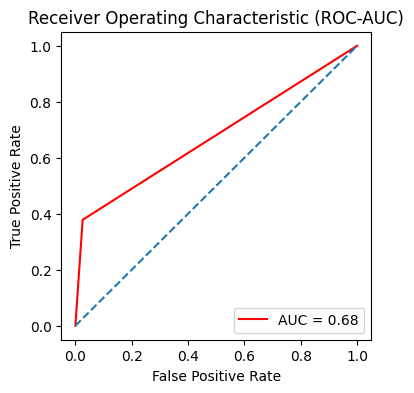

In [43]:
#generate roc auc curve values for KNN classifier
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, pred_knn)
roc_auc = auc(fpr, tpr)

#plot roc auc curve for KNN classifier
plt.figure(figsize=(4,4))
plt.title('Receiver Operating Characteristic (ROC-AUC)')
plt.plot(fpr, tpr, color='red',label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

Hybrid Model (Logistic Regression + Random Forest Classifier + K Nearest Neighbors Classifier) Model is:

In [44]:
#hybrid model of logistic regression and random forest classifier
from sklearn.ensemble import VotingClassifier #is used to import the voting classifier model.

model=VotingClassifier(estimators=[('LR',LogisticRegression()),('RF',RandomForestClassifier())],voting='soft',n_jobs=-1)#is used to create an instance of the voting classifier model.
model.fit(xv_train,y_train)#is used to train the model.

pred_model=model.predict(xv_test)#is used to predict the values for the testing data.

model.score(xv_test,y_test)#is used to calculate the accuracy of the model.

print(classification_report(y_test,pred_model))#is used to print the classification report of the model.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5881
           1       0.99      0.99      0.99      5339

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [45]:
#hybrid model of logistic regression and knn classifier
from sklearn.ensemble import VotingClassifier #is used to import the voting classifier model.

model=VotingClassifier(estimators=[('LR',LogisticRegression()),('KNN',KNeighborsClassifier())],voting='soft',n_jobs=-1)#is used to create an instance of the voting classifier model.
model.fit(xv_train,y_train)#is used to train the model.

pred_model=model.predict(xv_test)#is used to predict the values for the testing data.

model.score(xv_test,y_test)#is used to calculate the accuracy of the model.

print(classification_report(y_test,pred_model))#is used to print the classification report of the model.

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      5881
           1       0.98      0.61      0.76      5339

    accuracy                           0.81     11220
   macro avg       0.86      0.80      0.80     11220
weighted avg       0.85      0.81      0.80     11220



Grafical Representation of the Accuracy of the Models

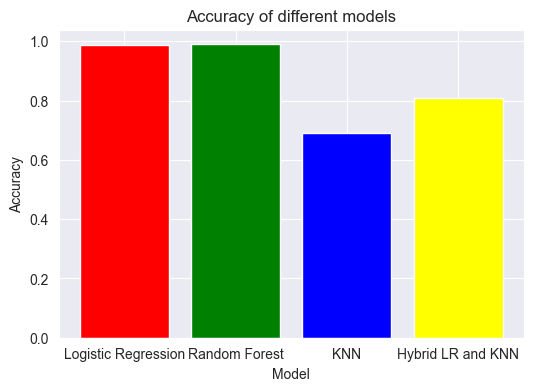

In [46]:
#Bar plot for the accuracy of the models used.
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of different models")
plt.bar(["Logistic Regression","Random Forest","KNN","Hybrid LR and KNN"],[accuracy_score(y_test,pred_lr),accuracy_score(y_test,pred_rf),accuracy_score(y_test,pred_knn),accuracy_score(y_test,pred_model)],color=["red","green","blue","yellow"])
plt.show()

Training and Testing Accuracy of the Models

In [47]:
#Training Accuracy
print("Training Accuracy of Logistic Regression is: ",accuracy_score(y_train,LR.predict(xv_train)))
print("Training Accuracy of Random Forest Classifier is: ",accuracy_score(y_train,RF.predict(xv_train)))
print("Training Accuracy of KNN Classifier is: ",accuracy_score(y_train,KNN.predict(xv_train)))
print("Training Accuracy of Hybrid Model of Logistic Regression and KNN Classifier is: ",accuracy_score(y_train,model.predict(xv_train)))

Training Accuracy of Logistic Regression is:  0.9912650781389268
Training Accuracy of Random Forest Classifier is:  0.999970289381425
Training Accuracy of KNN Classifier is:  0.7329312496286172
Training Accuracy of Hybrid Model of Logistic Regression and KNN Classifier is:  0.9750430803969339


In [48]:
#Testing Accuracy
print("Testing Accuracy of Logistic Regression is: ",accuracy_score(y_test,pred_lr))
print("Testing Accuracy of Random Forest Classifier is: ",accuracy_score(y_test,pred_rf))
print("Testing Accuracy of KNN Classifier is: ",accuracy_score(y_test,pred_knn))
print("Testing Accuracy of Hybrid Model of Logistic Regression and KNN Classifier is: ",accuracy_score(y_test,model.predict(xv_test)))

Testing Accuracy of Logistic Regression is:  0.9859180035650624
Testing Accuracy of Random Forest Classifier is:  0.9894830659536542
Testing Accuracy of KNN Classifier is:  0.6906417112299466
Testing Accuracy of Hybrid Model of Logistic Regression and KNN Classifier is:  0.8101604278074866


Model Testing

In [49]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    pred_RF=RF.predict(new_xv_test)
    pred_KNN=KNN.predict(new_xv_test)
    pred_model=model.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nRF Prediction: {} \nKNN Prediction: {} \nHybrid Model of Logistic Regression and KNN Classifier Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_RF[0]),output_lable(pred_KNN[0]),output_lable(pred_model[0])))

Static System:

In [52]:
news=str(input())
manual_testing(news)



LR Prediction: Fake News 
RF Prediction: Fake News 
KNN Prediction: Fake News 
Hybrid Model of Logistic Regression and KNN Classifier Prediction: Fake News


Dynamic Testing of the Models on the Test Data (Manual Testing) is: 

In [51]:
#Dynamic system
from tkinter import *
from PIL import ImageTk,Image
from tkinter import filedialog
root=Tk()
root.title("Fake News Detection")
root.geometry("425x670")
root.configure(background="#6666FF")
'''def openfn():
    filename=filedialog.askopenfilename(title='open')
    return filename'''
'''def open_img():
    x=openfn()
    img=Image.open(x)
    img=img.resize((150,150),Image.ANTIALIAS)
    img=ImageTk.PhotoImage(img)
    lbl=Label(image=img)
    lbl.image=img
    lbl.place(x=230,y=480)'''
#gif 
def gif():
    load=Image.open("D:/Dropbox/Study/GitHub/Fake-News-Detection/news.jpg")
    load=load.resize((150,150),Image.ANTIALIAS)
    render=ImageTk.PhotoImage(load)
    img=Label(image=render)
    img.image=render
    img.place(x=230,y=480)
    root.after(1000,gif)
gif()
def fake_news():
    news=text.get("1.0","end-1c")
    testing_news={"text":[news]}
    new_def_test=pd.DataFrame(testing_news)
    new_def_test["text"]=new_def_test["text"].apply(wordopt)
    new_x_test=new_def_test["text"]
    new_xv_test=vectorization.transform(new_x_test)
    pred_LR=LR.predict(new_xv_test)
    pred_RF=RF.predict(new_xv_test)
    pred_KNN=KNN.predict(new_xv_test)
    pred_model=model.predict(new_xv_test)
    t1.delete("1.0",END)
    t1.insert(END,output_lable(pred_model[0]))
    t2.delete("1.0",END)
    t2.insert(END,output_lable(pred_LR[0]))
    t3.delete("1.0",END)
    t3.insert(END,output_lable(pred_RF[0]))
    t4.delete("1.0",END)
    t4.insert(END,output_lable(pred_KNN[0]))
    
def clear():
    t1.delete("1.0",END)
    t2.delete("1.0",END)
    t3.delete("1.0",END)
    t4.delete("1.0",END)
    text.delete("1.0",END)
    
l1=Label(root,text="Fake News Detection",font=("bold",20),bg="#d16b4b",fg="#000000",width=20 ,height=2)
l1.place(x=60,y=10)

l2=Label(root,text="Enter News:",font=("bold",10),bg="#6666FF",fg="#000000")
l2.place(x=10,y=100)

#center
text=Text(root,height=15,width=50)
text.place(x=10,y=130)

b1=Button(root,text="Submit",command=fake_news,width=10,bg="#87d48e",fg="#000000")
b1.place(x=100,y=380)

b2=Button(root,text="Clear",command=clear,width=10,bg="#b04141",fg="#000000")
b2.place(x=230,y=380)

'''b3=Button(root,text="Open Image",command=gif,width=10,bg="#c7c35d",fg="#000000")
b3.place(x=270,y=380)'''

l3=Label(root,text="Prediction:",font=("bold",10),bg="#6666FF",fg="#000000")
l3.place(x=10,y=430)

t1=Text(root,height=1,width=20)
t1.place(x=10,y=460)

l4=Label(root,text="LR Prediction:",font=("bold",10),bg="#6666FF",fg="#000000")
l4.place(x=10,y=490)

t2=Text(root,height=1,width=20)
t2.place(x=10,y=520)

l5=Label(root,text="RF Prediction:",font=("bold",10),bg="#6666FF",fg="#000000")
l5.place(x=10,y=550)

t3=Text(root,height=1,width=20)
t3.place(x=10,y=580)

l6=Label(root,text="KNN Prediction:",font=("bold",10),bg="#6666FF",fg="#000000")
l6.place(x=10,y=610)

t4=Text(root,height=1,width=20)
t4.place(x=10,y=640)

root.mainloop()

C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_5484\3590921166.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  load=load.resize((150,150),Image.ANTIALIAS)
C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_5484\3590921166.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  load=load.resize((150,150),Image.ANTIALIAS)
C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_5484\3590921166.py:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  load=load.resize((150,150),Image.ANTIALIAS)
